In [1]:
import pyforest
from math import sqrt

# The Data

In [2]:
data = pd.read_csv(
    r'calories.csv'
)

data.head()

<IPython.core.display.Javascript object>

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [4]:
data['User_ID'].nunique()

15000

- Data has no null
- Each row is a unique and represents a valid observation
- Straight to EDA

In [5]:
data.drop('User_ID', axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,42.789800,16.980264,20.0,28.0,39.0,56.0,79.0
Height,15000.0,174.465133,14.258114,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,74.966867,15.035657,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,15.530600,8.319203,1.0,8.0,16.0,23.0,30.0
Heart_Rate,15000.0,95.518533,9.583328,67.0,88.0,96.0,103.0,128.0
Body_Temp,15000.0,40.025453,0.779230,37.1,39.6,40.2,40.6,41.5
Calories,15000.0,89.539533,62.456978,1.0,35.0,79.0,138.0,314.0


    The dataset contains record of 15,000 workout sessions from adults aged 20 to 79, with participants averaging 174 cm in height, 75 kg in weight, and a heart rate of about 96 bpm; workouts last around 15.5 minutes on average, resulting in approximately 90 calories burned per session, with some variability and a few extreme height and weight values suggesting potential outliers.

# EDA

## Target Exploration

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

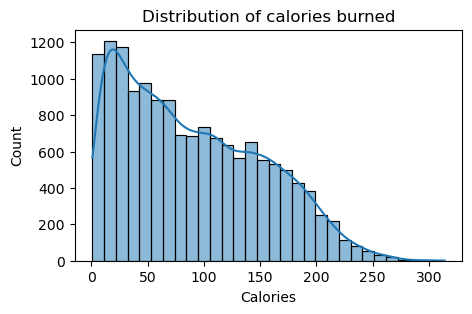

In [6]:
plt.figure(figsize = (5, 3))
sns.histplot(
    data = data,
    x = 'Calories',
    bins = 30,
    kde = True
).set_title('Distribution of calories burned');

## Feature Exploration

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

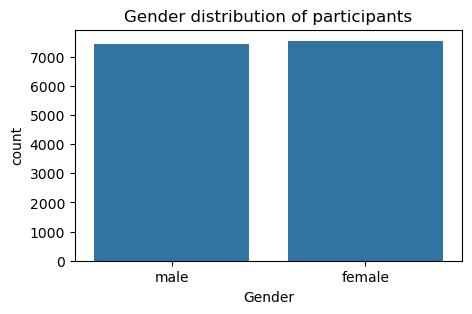

In [7]:
plt.figure(figsize = (5, 3))
sns.countplot(
    data = data,
    x = 'Gender'
).set_title('Gender distribution of participants');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

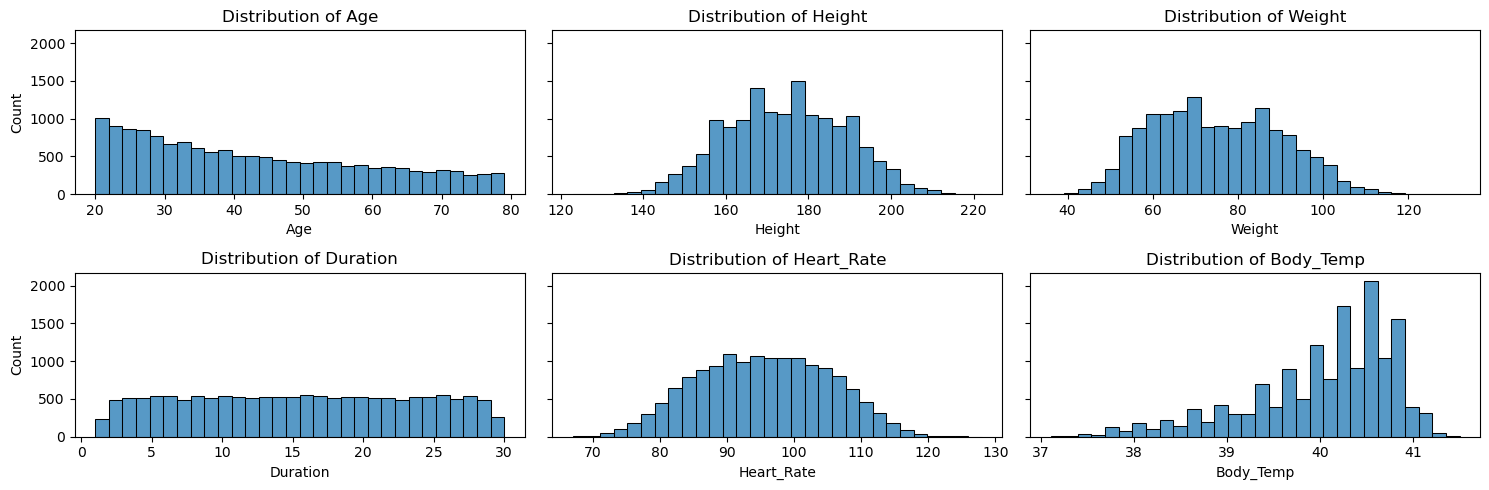

In [8]:
num_cols = data.drop(['User_ID', 'Calories'], axis = 1).select_dtypes(include = 'number').columns

fig, ax = plt.subplots(2, 3, figsize = (15, 5), sharey = True)

ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(
        data = data,
        x = col,
        bins = 30,
        ax = ax[i]
    ).set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## Feature-Target Relationship

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

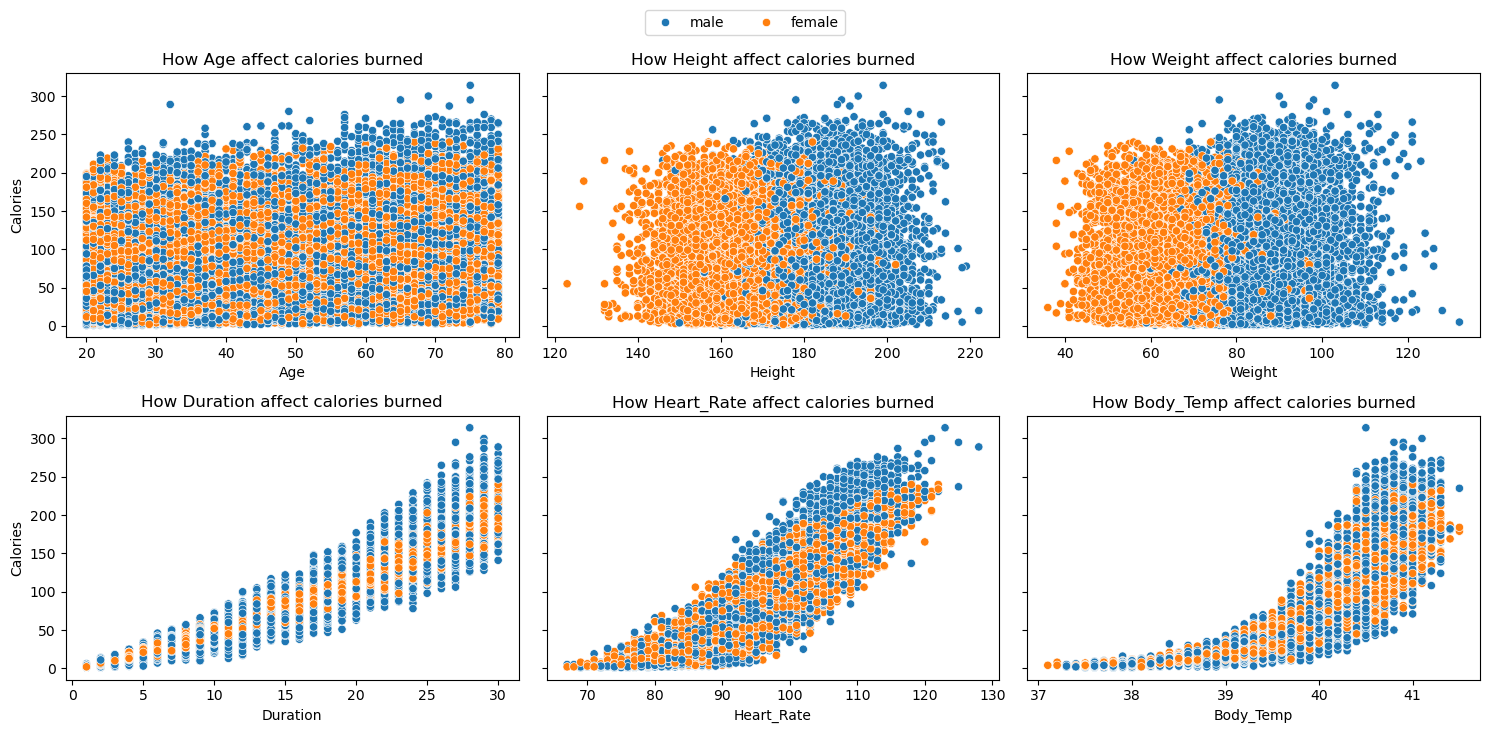

In [9]:
# Create a separate figure just for legend extraction
temp_fig, temp_ax = plt.subplots()
temp_plot = sns.scatterplot(
    data = data,
    x = num_cols[0],
    y = 'Calories',
    hue = 'Gender',
    ax = temp_ax
)
handles, labels = temp_ax.get_legend_handles_labels()
plt.close(temp_fig)  # Close only the temporary figure

# Now create the actual figure
fig, ax = plt.subplots(2, 3, figsize=(15, 7), sharey = True)
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.scatterplot(
        data = data,
        x = col,
        y = 'Calories',
        ax = ax[i],
        hue = 'Gender',
        legend = False
    )
    ax[i].set_title(f'How {col} affect calories burned')

# Add a single legend to the top center
fig.legend(handles, labels, loc = 'upper center', ncol = len(labels), bbox_to_anchor = (0.5, 1.05))

plt.tight_layout()
plt.show()

    - Across the metrics, male burn slightly higher calories than females.
    - Duration of activity is the strongest predictor of calories burned. It also explains metrics shuch as heart_rate and body_temp
    - Male weigh and are taller than females.

## Correlation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

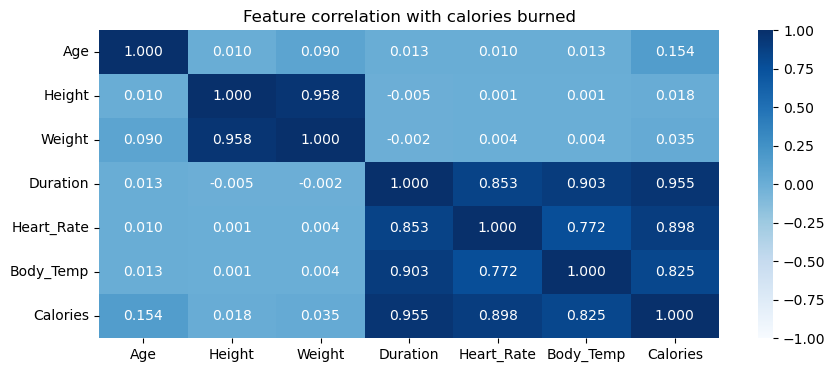

In [10]:
correlation = data.drop('User_ID', axis = 1).corr(numeric_only = True)

plt.figure(figsize = (10, 4))
sns.heatmap(
    data = correlation,
    vmin = -1,
    vmax = 1,
    annot = True,
    fmt = '.3f',
    cmap = 'Blues'
).set_title(f'Feature correlation with calories burned');

    The correlation matrix shows multicollinearity in these features:
    - Height & Weight (0.958) - combine to BMI = (weight / height(m)²)
    - Duration, Heart_rate, Body_Temp (0.853, 0.903, 0.772) - Leave as is as. The longer you exercise, the higher your heart rate and also body temperature

# Modelling Data Prep

In [11]:
data['Height (m)'] = data['Height'] / 100
data['bmi'] = data['Weight'] / (data['Height (m)'] ** 2)

data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Height (m),bmi
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1.90,26.038781
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1.66,21.773842
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1.79,24.655910
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1.79,22.159109
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1.54,24.456063


In [12]:
# Drop Height & Weight
# Select features for modelling

features = [
    'Gender',
    'Age',
    'Duration',
    'Heart_Rate',
    'Body_Temp',
    'bmi'
]

X = data[features]
y = data['Calories']

num_feat = ['Age', 'Duration', 'Heart_Rate', 'Body_Temp', 'bmi']
cat_feat = ['Gender']

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import shap

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
preprocessor = ColumnTransformer(transformers = [
    ('scaler', StandardScaler(), num_feat),
    ('encoder', OneHotEncoder(drop = 'if_binary', sparse_output = False, handle_unknown = 'ignore'), cat_feat)
])

# Modelling

In [16]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha = 1.0, random_state = 2025),
    'K Nearest Neighbor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state = 2025),
    'Random Forest': RandomForestRegressor(random_state = 2025),
    'Gradient Boosting': GradientBoostingRegressor(random_state = 2025)
}

result = []
pipelines = {}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    train_score = pipe.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    result.append({
        'name': name,
        'train_score': train_score,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

    pipelines[name] = pipe

results_df = pd.DataFrame(result)

<IPython.core.display.Javascript object>

In [19]:
results_df.sort_values(by = ['R2', 'RMSE', 'MAE'], ascending = False)

,name,train_score,MAE,RMSE,R2
4,Random Forest,0.999463,2.561771,3.855570,0.996234
5,Gradient Boosting,0.995437,3.228148,4.473946,0.994929
2,K Nearest Neighbor,0.994047,4.236622,5.842070,0.991354
3,Decision Tree,1.000000,3.963778,6.003499,0.990869
0,Linear Regression,0.967149,8.460131,11.596722,0.965931
1,Ridge Regression,0.967149,8.459863,11.596909,0.965930


    The two best performing models are;
        - Random Forest: Best predictive model (R2 - 0.996), Lowest error (MAE - 2.562, RMSE - 3.856)
        - Gradient Bosting: Superior generalization, second lowest error (MAE - 3.228, RMSE - 4.474)

# Hyperparameter Tuning

In [25]:
pd.set_option('display.max_colwidth', None)   # show full column content
pd.set_option('display.max_rows', None)       # show all rows
pd.set_option('display.max_columns', None)    # show all columns
pd.set_option('display.width', 0)             # allow unlimited line width

top_models = {
    'Random Forest': pipelines['Random Forest'],
    'Gradient Boosting': pipelines['Gradient Boosting']
}

# Hyperparameter Tuning

param_grid = {
    'Random Forest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [10, 20, None],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf':[1, 2, 3],
        'model__max_features': ['sqrt', 'log2']
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.05, 0.1, 0.2],
        'model__max_depth': [3, 4, 5],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__subsample': [0.8, 1.0],
        'model__max_features': ['sqrt', 'log2']
    }
}

results = []

for name, model in top_models.items():
    print(f'\n Tuning {name}')

    grid_search = GridSearchCV(
        estimator = model,
        param_grid = param_grid[name],
        cv = 5,
        scoring = 'r2',
        n_jobs = -1,
        verbose = 2
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Evaluate performance
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    # Store results
    results.append({
        'name': name,
        'best_params': best_params,
        'train_score': train_score,
        'test_score': test_score,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

# 6️⃣ Compare all models in a DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by = 'R2', ascending = False)
print("\nModel Comparison Summary:\n")
results_df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 Tuning Random Forest
Fitting 5 folds for each of 162 candidates, totalling 810 fits

 Tuning Gradient Boosting
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


<IPython.core.display.Javascript object>


Model Comparison Summary:



,name,best_params,train_score,test_score,MAE,RMSE,R2
1,Gradient Boosting,"{'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300, 'model__subsample': 0.8}",0.997861,0.996897,2.490895,3.499765,0.996897
0,Random Forest,"{'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300}",0.999318,0.995066,2.834706,4.413093,0.995066


In [26]:
best_model_name = results_df.iloc[0]['name']

final_best_model = [
    m for (n, m) in top_models.items() if n == best_model_name
][0]

# Model Interpretation

## Permutation Importance

In [27]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(
    final_best_model, X_test, y_test, n_repeats = 10, random_state = 2025, n_jobs = -1
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

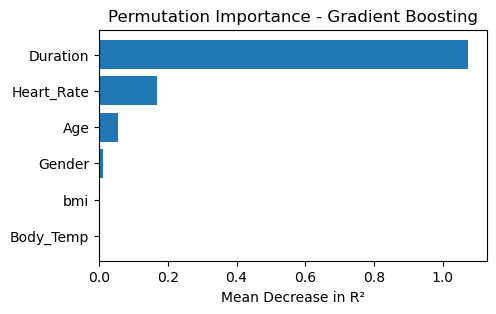

In [28]:
perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (5, 3))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title(f'Permutation Importance - {best_model_name}')
plt.xlabel('Mean Decrease in R²')
plt.show()

## SHAP

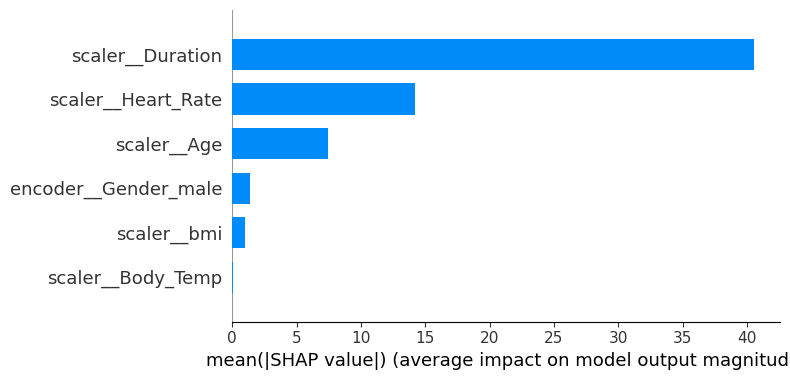

In [29]:
explainer = shap.TreeExplainer(final_best_model.named_steps['model'])
X_test_transformed = final_best_model.named_steps['preprocessor'].transform(X_test)
feature_names = final_best_model.named_steps['preprocessor'].get_feature_names_out()
shap_values = explainer.shap_values(X_test_transformed)
shap.summary_plot(shap_values, X_test_transformed, feature_names = feature_names, plot_type = 'bar')